In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fbprophet

import datetime as dt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [12]:
data = pd.read_csv('model - Dummydata.csv')
data

,Date,Average
0,7/1/2021,3.754167
1,7/2/2021,3.735294
2,7/3/2021,3.750000
3,7/4/2021,3.730769
4,7/5/2021,3.715517
...,...,...
95,10/4/2021,2.700000
96,10/5/2021,2.729167
97,10/6/2021,2.717391
98,10/7/2021,2.727273


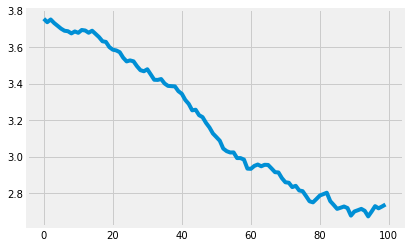

In [14]:
data['Average'].plot()

In [15]:
prophet_df = data.copy()
prophet_df.rename(columns={'Average': 'y', 'Date': 'ds'}, inplace=True)

prophet_df.head()

,ds,y
0,7/1/2021,3.754167
1,7/2/2021,3.735294
2,7/3/2021,3.750000
3,7/4/2021,3.730769
4,7/5/2021,3.715517


In [16]:
m = fbprophet.Prophet()

m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Create Future dates
fut_prices = m.make_future_dataframe(periods=100)

# Predict Prices
forecast = m.predict(fut_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

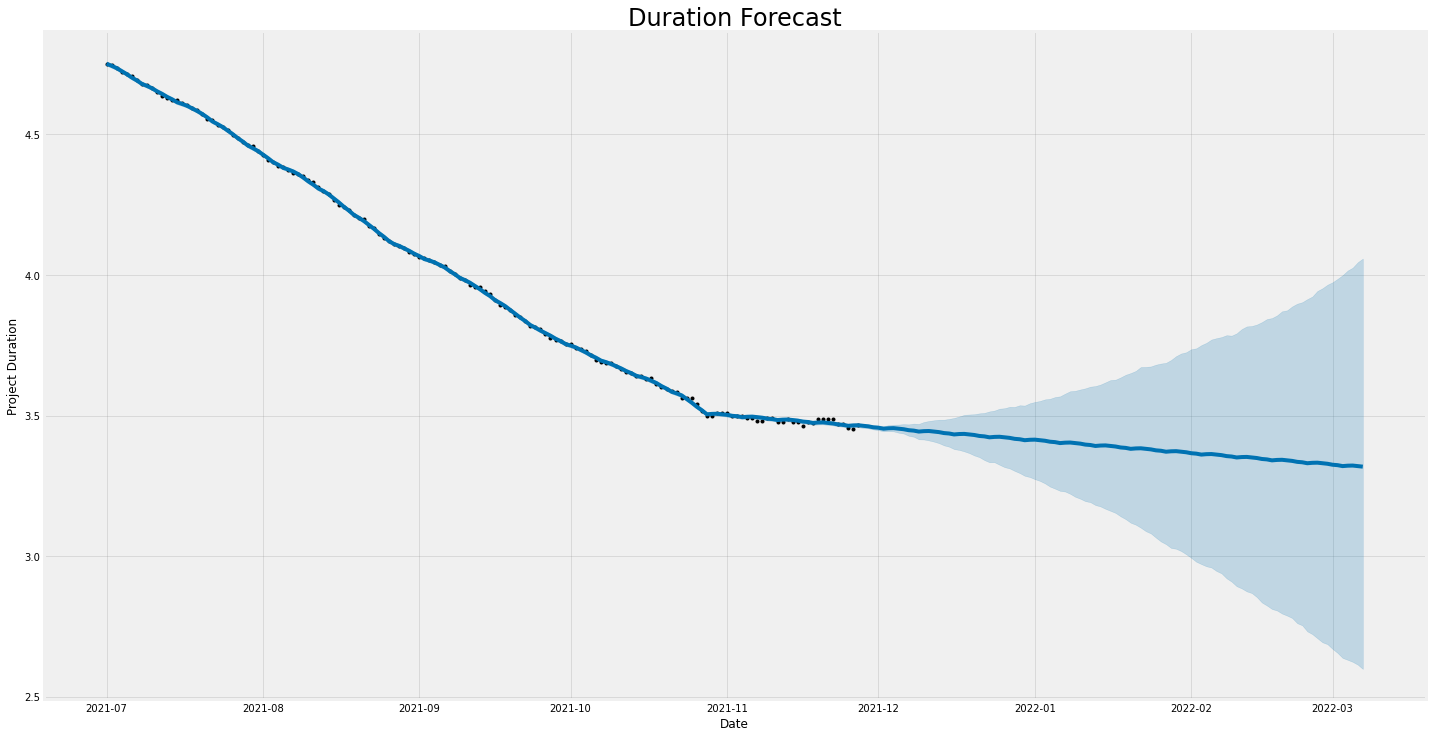

In [10]:
import datetime as dt
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2021, 1, 1)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2020, 4, 10)
trend_date1 = mdates.date2num(trend_date)

fig = m.plot(forecast, figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_title("Duration Forecast", fontsize=24)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Project Duration", fontsize=12)

plt.show()